In [29]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt
import pandas as pd
from  matplotlib.animation import FuncAnimation

In [31]:
# defining a function which checks if the person is out of range(1 to 100)
def check_range(position, edge): # position is either x or y. edge is either x_edge or y_edge
    if 1 <= position <= edge:
        return True
    else:
        return False

In [32]:
# this will be used to measure distance between people.
def distance(position1, position2):
    delta_x = position1[0] - position2[0]
    delta_y = position1[1] - position2[1]
    return (delta_x**2 + delta_y**2)**0.5

In [33]:
# checks all the people if they are infected or not by their positions.
# infected_people consists of indexes of infected people.
# this will be used every time 'positions_array' is updated.
def check_infection1(infected_people, positions_array, num_people):
    new_infected_people = []
    for i in range(num_people):
        if i in infected_people:
            continue
        else:
            for j in infected_people:
                if distance(positions_array[i,:], positions_array[j, :]) < 2:
                    new_infected_people.append(i)
                    break
    infected_people += new_infected_people
    return infected_people

In [34]:
# sets initial positions as 2d array with the shape of (num_people, 2)
def set_initial_positions(num_people, x_edge, y_edge):
    positions_list = []
    for i in range(num_people):
        position = randint(1, x_edge), randint(1, y_edge)
        positions_list.append(position)
    return np.array(positions_list).reshape(-1, 2)
    

In [35]:
def set_infected_people(num_infected, num_people):
    infected_people = []
    for i in range(num_infected):
        while True:
            infected_person = randint(0, num_people-1)# matrix's index starts at 0. So its index ranges from 0 to num_people-1
            if not infected_person in infected_people:
                infected_people.append(infected_person)
                break
    return infected_people

In [30]:
positive_or_negative = [1, -1]

In [36]:
def set_velocity():
    velocity_x = positive_or_negative[randint(0, 1)]
    velocity_y = positive_or_negative[randint(0, 1)]
    return velocity_x, velocity_y

In [37]:
def set_initial_velocity(num_people):
    velocities_list = []
    for i in range(num_people):
        velocities_list.append(set_velocity())
    return np.array(velocities_list).reshape(-1, 2)

In [38]:
def find_infected_positions(infected_people, positions_array):
    infected_positions_list = []
    for i in infected_people:
        infected_positions_list.append(positions_array[i,:])
    return np.array(infected_positions_list)

In [39]:
def move_people(num_infected, num_people, positions_array, velocities_array, x_edge, y_edge):
    for i in range(num_people):
        x, y = positions_array[i]
        velocity_x, velocity_y = velocities_array[i]
        new_x = x + velocity_x
        if check_range(new_x, x_edge) == False:
            if velocity_x == -1:
                velocity_x = 1
                new_x = x + velocity_x
                if check_range(new_x, x_edge) == False:
                    print(positions_array[i], velocities_array[i],new_x , ny, velocity_x, velocity_y)
                    raise ValueError                        
            elif velocity_x == 1:
                velocity_x = -1
                new_x = x + velocity_x
                if check_range(new_x, x_edge) == False:
                    print(positions_array[i], velocities_array[i],new_x , ny, velocity_x, velocity_y)
                    raise ValueError
        x = new_x
        new_y = y + velocity_y
        if check_range(new_y, y_edge) == False:
            if velocity_y == -1:
                velocity_y = 1
                new_y = y + velocity_y
                if check_range(new_y, y_edge) == False:
                    print(positions_array[i], velocities_array[i],x, new_y, velocity_x, velocity_y)
                    raise ValueError
            elif velocity_y == 1:
                velocity_y = -1
                new_y = y + velocity_y
                if check_range(new_y, y_edge) == False:
                    print(positions_array[i], velocities_array[i],x, new_y, velocity_x, velocity_y)
                    raise ValueError
        y = new_y
        positions_array[i] = np.array([x,y])
        velocities_array[i] = np.array([velocity_x,velocity_y])
    return positions_array, velocities_array

In [40]:
def infection_model1(duration, num_people, num_infected, x_edge, y_edge):
    # this is going to hold important results. 
    results = pd.DataFrame(columns = ['t', 'num_infected', 'infected_positions_array', 'positions_array'])
    # setting initial positions as 2d array with the shape of (num_people, 2)
    positions_array = set_initial_positions(num_people, x_edge, y_edge)
    # setting initial velocities as 2d array with the shape of (num_people, 2)
    velocities_array = set_initial_velocity(num_people)
    # chosing which people are infected randomly
    infected_people = set_infected_people(num_infected, num_people)
    # saving initial states
    infected_positions_array = find_infected_positions(infected_people, positions_array)
    results.loc[0] = [0, num_infected, infected_positions_array, positions_array]
    # moving people's positions 'duration' times
    for t in range(1, duration+1):
        positions_array, velocities_array = move_people(num_infected, num_people, positions_array, velocities_array, x_edge, y_edge)
        infected_people = check_infection1(infected_people, positions_array, num_people)
        num_infected = len(infected_people)
        infected_positions_array = find_infected_positions(infected_people, positions_array)
        results.loc[t] = [t, num_infected, infected_positions_array, positions_array]
    return results

In [49]:
results = infection_model1(duration=1000, num_people = 1000, num_infected = 5, x_edge = 500, y_edge = 500)
results

,t,num_infected,infected_positions_array,positions_array
0,0,5,"[[252, 207], [116, 87], [91, 185], [491, 363],...","[[14, 365], [456, 450], [366, 464], [492, 480]..."
1,1,5,"[[251, 208], [117, 88], [90, 184], [490, 362],...","[[14, 365], [456, 450], [366, 464], [492, 480]..."
2,2,5,"[[250, 209], [118, 89], [89, 183], [489, 361],...","[[14, 365], [456, 450], [366, 464], [492, 480]..."
3,3,5,"[[249, 210], [119, 90], [88, 182], [488, 360],...","[[14, 365], [456, 450], [366, 464], [492, 480]..."
4,4,5,"[[248, 211], [120, 91], [87, 181], [487, 359],...","[[14, 365], [456, 450], [366, 464], [492, 480]..."
...,...,...,...,...
996,996,1000,"[[254, 205], [114, 85], [93, 187], [493, 365],...","[[14, 365], [456, 450], [366, 464], [492, 480]..."
997,997,1000,"[[253, 206], [115, 86], [92, 186], [492, 364],...","[[14, 365], [456, 450], [366, 464], [492, 480]..."
998,998,1000,"[[252, 207], [116, 87], [91, 185], [491, 363],...","[[14, 365], [456, 450], [366, 464], [492, 480]..."
999,999,1000,"[[251, 208], [117, 88], [90, 184], [490, 362],...","[[14, 365], [456, 450], [366, 464], [492, 480]..."


In [1]:
pd.set_option('max_rows', None)
print(results[['t', 'num_infected']])

NameError: name 'pd' is not defined

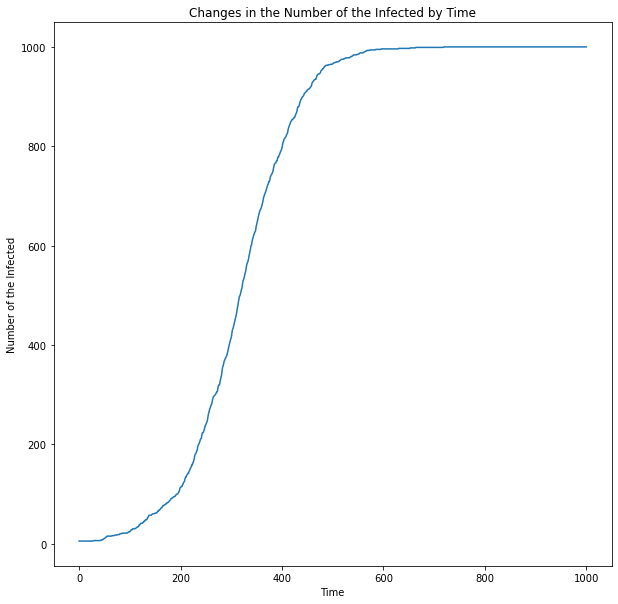

In [54]:
plt.figure(figsize = (10, 10))
plt.plot(results.t, results.num_infected)
plt.title('Changes in the Number of the Infected by Time')
plt.xlabel('Time')
plt.ylabel('Number of the Infected')
plt.savefig('figure1.png')
plt.show()

fig = plt.figure(figsize=(10, 6))
x = np.arange(0, 10, 0.1)

def update(i, fig_title, A):
    if i != 0:
        plt.cla()                      # 現在描写されているグラフを消去

    y = A * np.sin(x - i)
    plt.plot(x, y, "r")
    plt.title(fig_title + 'i=' + str(i))


ani = anm.FuncAnimation(fig, update, fargs = ('Initial Animation! ', 2.0), \
    interval = 100, frames = 132)

ani.save("Sample.gif", writer = 'imagemagick')

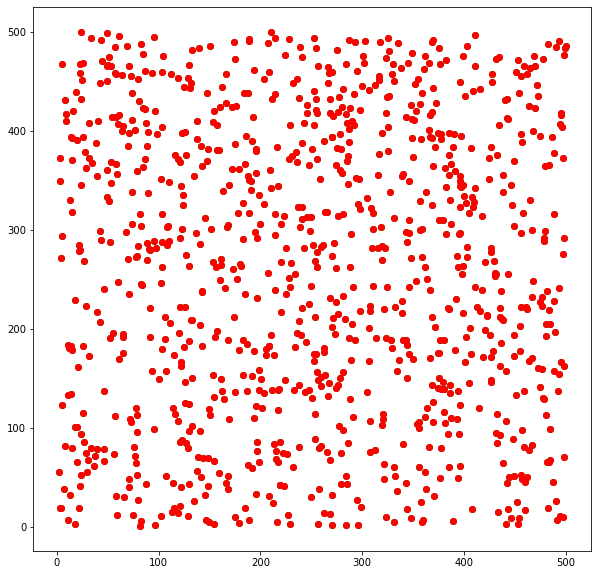

In [48]:
fig = plt.figure(figsize = (10,10))
# this function will be added at the end of the mother-function to animte.
def update(i):
    # erasing existing graphs
    if i != 0:
        plt.cla()
    # setting variables for readability
    positions_array = results['positions_array'].iloc[i]
    infected_positions_array = results['infected_positions_array'].iloc[i]
    # ploting infected people as red and not infected ones as green
    plt.scatter(positions_array[:,0], positions_array[:,1], color = 'green')
    plt.scatter(infected_positions_array[:,0], infected_positions_array[:,1], color = 'red')
    

ani = FuncAnimation(fig, update, interval=10, frames = 1000+1)
ani.save('infection.gif', writer = 'pillow')